<a href="https://colab.research.google.com/github/zaakhazal/Graduation_Project/blob/main/Linear_DNN_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd
import tensorflow as tf
from keras import Model, layers, Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
import seaborn as sns
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

np.set_printoptions(precision=3, suppress=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/colab/students_dataset03.csv"
df = pd.read_csv(path)

In [ ]:
dataset = df.copy()
dataset = dataset.astype(float)

In [ ]:
#sipliting train and test dataset
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(f"No. of training examples: {train_dataset.shape[0]}")
print(f"No. of testing examples: {test_dataset.shape[0]}")

No. of training examples: 105
No. of testing examples: 26


In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
You are studying in semester,105.0,4.295238,1.807696,2.0,3.000,4.0000,6.0000,8.00
your GAT percentage is?,105.0,84.056524,4.289123,70.0,81.000,85.0000,87.5000,91.13
your 2nd percentage is?,105.0,75.574381,6.363086,57.0,72.000,76.0000,80.0000,86.40
How seriously do you take your pre examination breaks?,105.0,0.676190,0.642939,0.0,0.000,1.0000,1.0000,2.00
Self study per day?,105.0,0.609524,0.490197,0.0,0.000,1.0000,1.0000,1.00
You spend in googling study materials,105.0,0.685714,0.466457,0.0,0.000,1.0000,1.0000,1.00
Do you have a personal hobby?,105.0,1.047619,0.944426,0.0,0.000,1.0000,2.0000,2.00
Do you do your assignment yourself?,105.0,1.238095,0.893608,0.0,0.000,2.0000,2.0000,3.00
How is your class attendance?,105.0,0.533333,0.680309,0.0,0.000,0.0000,1.0000,2.00
How do you do your assignments?,105.0,0.566537,0.873197,0.0,0.100,0.1300,1.0000,3.00


In [ ]:
#features is x, labels is y
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('GPA')
test_labels = test_features.pop('GPA')

### The Normalization layer

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[ 4.295 84.057 75.574  0.676  0.61   0.686  1.048  1.238  0.533  0.567
   3.038  2.01   1.61   0.829  0.537  0.79   0.819]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 4.  86.7 74.   0.   1.   1.   2.   2.   0.   1.   3.   3.   2.   1.
   1.   1.   1. ]]

Normalized: [[-0.16  0.62 -0.25 -1.06  0.8   0.68  1.01  0.86 -0.79  0.5  -0.04  0.85
   0.52  0.45  1.01  0.51  0.47]]


Linear regression with multiple inputs

Build the Keras Sequential model:

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 18        
                                                                 
Total params: 53
Trainable params: 18
Non-trainable params: 35
_________________________________________________________________


In [ ]:
linear_model.predict(train_features[:10])


array([[ 0.944],
       [-0.372],
       [ 0.391],
       [ 0.032],
       [ 0.609],
       [ 0.86 ],
       [-1.004],
       [ 2.675],
       [ 0.741],
       [ 0.202]], dtype=float32)

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 2.5 s, sys: 119 ms, total: 2.62 s
Wall time: 2.64 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.247850,0.390406,95
96,0.259047,0.429037,96
97,0.252931,0.399163,97
98,0.252549,0.417939,98
99,0.250708,0.412725,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [GPA]')
  plt.legend()
  plt.grid(True)

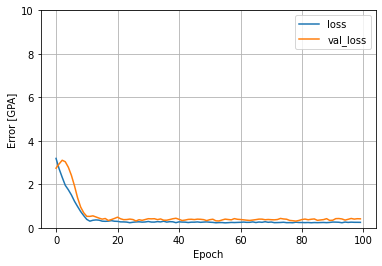

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)

# **Regression with a deep neural network (DNN)**

In [ ]:
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                1152      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,412
Trainable params: 5,377
Non-trainable params: 35
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.71 s, sys: 139 ms, total: 2.85 s
Wall time: 2.66 s


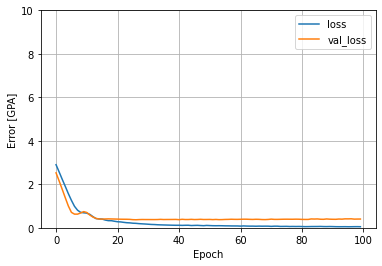

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model']

0.4713587462902069

# **RandomForestRegressor**

In [ ]:
# Initializing the Random Forest Regression model with 100 decision trees
RandomForest_model = RandomForestRegressor(n_estimators = 100, random_state = 0)

RandomForest_model.fit(train_features, train_labels)

RandomForestRegressor(random_state=0)

In [ ]:
# Predicting the target values of the test set
y_pred = RandomForest_model.predict(test_features)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(test_labels, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.393


In [ ]:
test_results['RandomForest_model'] = mean_squared_error(test_labels, y_pred)
test_results['RandomForest_model']

0.1547350727818477

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,0.576896
dnn_model,0.471359
RandomForest_model,0.154735


**Make predictions**

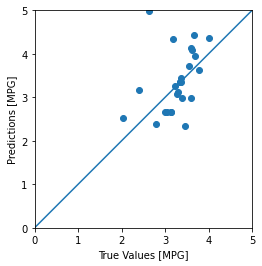

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

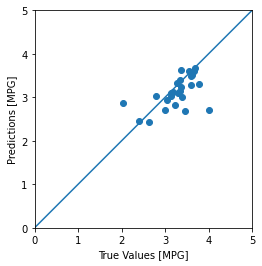

In [ ]:
#test predections for RandomForest_model
test_RandomForest_predictions = RandomForest_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_RandomForest_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

 **check the error distribution:**

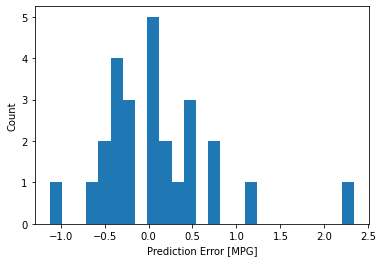

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

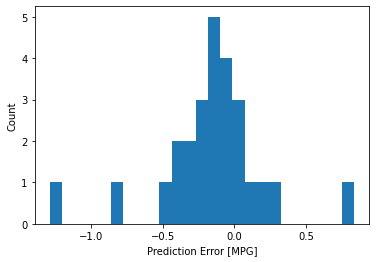

In [ ]:
error = test_RandomForest_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [ ]:
# Export the model to a SavedModel.
dnn_model.save('project/dnn_model')

INFO:tensorflow:Assets written to: project/dnn_model/assets
